In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from gensim.parsing.preprocessing import remove_stopwords
from gensim.utils import simple_preprocess
from gensim.parsing.porter import PorterStemmer

In [2]:
data=pd.read_csv("Data/Books_rating.csv")

In [72]:
data.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561886
review/helpfulness          0
review/score                0
review/time                 0
review/summary             38
review/text                 8
dtype: int64

In [73]:
data=data.dropna(subset=['review/summary'],axis=0)
data=data.dropna(subset=['review/text'],axis=0)

In [71]:
data.isna().sum()

Id                        0
Title                     0
Price                 42018
User_id                9380
profileName            9380
review/helpfulness        0
review/score              0
review/time               0
review/summary            0
review/text               1
dtype: int64

In [4]:
subsetData=data.sample(n=50000,replace=False)

In [75]:
subsetData.shape

(50000, 10)

In [76]:
subsetData.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1554475,0736600280,The Years With Ross,NaN,A384UMEUE6PD1O,foulpole75,0/1,4.0,1349654400,"Nice, older copy","It's on old-school paperback, which I love. My..."
1119062,0892747382,The Root of Rejection: Escape the Bondage of R...,NaN,NaN,NaN,16/18,5.0,919468800,Great! It will change your life for the better!,This book has changed the way I look at all th...
2412534,0307280721,"Eldest (Inheritance, Book 2)",33.97,NaN,NaN,2/5,2.0,1133568000,please CP stop doing that.....!,hithe books was .. i dont know what to say thu...
2143164,B0009RJUVE,The Pact: A Love Story,NaN,A1UCP5P0UJ4Z3K,Connie Hurlburt,0/0,4.0,1357776000,Liked,I am a fan of Jodi Picoult and was again not d...
2029323,B000FFQ85G,Jane Eyre / Wuthering Heights,NaN,A1X2VMGXMYO181,Katherine Williams,0/0,1.0,1362009600,"Classic read, really???",So I know that this is considered a classic bo...


([<matplotlib.patches.Wedge at 0x7fdcda013220>,
 [Text(-0.3494357319622008, 1.0430218929763848, '5.0'),
  Text(-0.3370907822596808, -1.0470767901713594, '4.0'),
  Text(0.5950010424354616, -0.9251884994425268, '3.0'),
  Text(0.95432830722172, -0.5470443145078162, '1.0'),
  Text(1.0866511273658728, -0.17084884370249107, '2.0')],
 [Text(-0.19060130834301858, 0.5689210325325734, '60.29%'),
  Text(-0.18386769941437134, -0.5711327946389232, '19.51%'),
  Text(0.32454602314661535, -0.5046482724231963, '8.60%'),
  Text(0.5205427130300291, -0.2983878079133543, '6.64%'),
  Text(0.5927187967450214, -0.09319027838317694, '4.96%')])

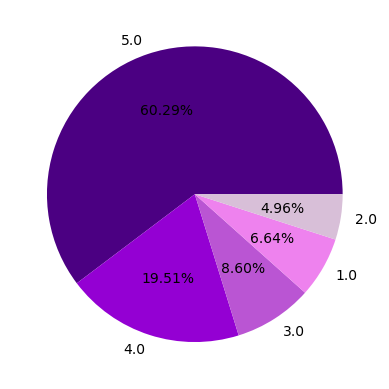

In [77]:
colors = ['indigo', 'darkviolet','mediumorchid','violet','thistle']
labels = subsetData['review/score'].value_counts().keys().map(str)
values = subsetData['review/score'].value_counts()
plt.pie(values,colors=colors,labels=labels,autopct='%1.2f%%')

In [10]:
subsetData['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in subsetData['review/text']] 

In [79]:
print(subsetData['tokenized_text'].head(10))

1554475    [it, on, old, school, paperback, which, love, ...
1119062    [this, book, has, changed, the, way, look, at,...
2412534    [hithe, books, was, dont, know, what, to, say,...
2143164    [am, fan, of, jodi, picoult, and, was, again, ...
2029323    [so, know, that, this, is, considered, classic...
2903236    [ll, never, forget, this, book, as, long, as, ...
2825483    [really, enjoyed, the, first, person, narrativ...
1255174    [wanted, to, add, this, to, my, collection, an...
636367     [the, single, most, influential, novel, of, th...
723057     [east, of, eden, draws, from, the, biblical, s...
Name: tokenized_text, dtype: object


In [80]:
subsetData['tokenized_summary'] = [simple_preprocess(line, deacc=True) for line in subsetData['review/summary']] 

In [81]:
print(subsetData['tokenized_summary'].head(10))

1554475                                  [nice, older, copy]
1119062    [great, it, will, change, your, life, for, the...
2412534                      [please, cp, stop, doing, that]
2143164                                              [liked]
2029323                              [classic, read, really]
2903236              [this, is, the, best, book, ever, read]
2825483                             [wonderful, quick, read]
1255174                              [right, on, the, money]
636367                                           [wonderful]
723057                                      [east, of, eden]
Name: tokenized_summary, dtype: object


In [82]:
subsetData.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,tokenized_text,tokenized_summary
1554475,0736600280,The Years With Ross,NaN,A384UMEUE6PD1O,foulpole75,0/1,4.0,1349654400,"Nice, older copy","It's on old-school paperback, which I love. My...","[it, on, old, school, paperback, which, love, ...","[nice, older, copy]"
1119062,0892747382,The Root of Rejection: Escape the Bondage of R...,NaN,NaN,NaN,16/18,5.0,919468800,Great! It will change your life for the better!,This book has changed the way I look at all th...,"[this, book, has, changed, the, way, look, at,...","[great, it, will, change, your, life, for, the..."
2412534,0307280721,"Eldest (Inheritance, Book 2)",33.97,NaN,NaN,2/5,2.0,1133568000,please CP stop doing that.....!,hithe books was .. i dont know what to say thu...,"[hithe, books, was, dont, know, what, to, say,...","[please, cp, stop, doing, that]"
2143164,B0009RJUVE,The Pact: A Love Story,NaN,A1UCP5P0UJ4Z3K,Connie Hurlburt,0/0,4.0,1357776000,Liked,I am a fan of Jodi Picoult and was again not d...,"[am, fan, of, jodi, picoult, and, was, again, ...",[liked]
2029323,B000FFQ85G,Jane Eyre / Wuthering Heights,NaN,A1X2VMGXMYO181,Katherine Williams,0/0,1.0,1362009600,"Classic read, really???",So I know that this is considered a classic bo...,"[so, know, that, this, is, considered, classic...","[classic, read, really]"


In [83]:
subsetData.reset_index(drop=True, inplace=True)

In [84]:
subsetData.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,tokenized_text,tokenized_summary
0,0736600280,The Years With Ross,NaN,A384UMEUE6PD1O,foulpole75,0/1,4.0,1349654400,"Nice, older copy","It's on old-school paperback, which I love. My...","[it, on, old, school, paperback, which, love, ...","[nice, older, copy]"
1,0892747382,The Root of Rejection: Escape the Bondage of R...,NaN,NaN,NaN,16/18,5.0,919468800,Great! It will change your life for the better!,This book has changed the way I look at all th...,"[this, book, has, changed, the, way, look, at,...","[great, it, will, change, your, life, for, the..."
2,0307280721,"Eldest (Inheritance, Book 2)",33.97,NaN,NaN,2/5,2.0,1133568000,please CP stop doing that.....!,hithe books was .. i dont know what to say thu...,"[hithe, books, was, dont, know, what, to, say,...","[please, cp, stop, doing, that]"
3,B0009RJUVE,The Pact: A Love Story,NaN,A1UCP5P0UJ4Z3K,Connie Hurlburt,0/0,4.0,1357776000,Liked,I am a fan of Jodi Picoult and was again not d...,"[am, fan, of, jodi, picoult, and, was, again, ...",[liked]
4,B000FFQ85G,Jane Eyre / Wuthering Heights,NaN,A1X2VMGXMYO181,Katherine Williams,0/0,1.0,1362009600,"Classic read, really???",So I know that this is considered a classic bo...,"[so, know, that, this, is, considered, classic...","[classic, read, really]"


In [85]:
def split_train_test(subsetData, test_size=0.2, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(subsetData[['tokenized_summary', 'tokenized_text']], 
                                                        subsetData['review/score'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(subsetData)

Value counts for Train sentiments
5.0    24162
4.0     7757
3.0     3417
1.0     2658
2.0     2006
Name: review/score, dtype: int64
Value counts for Test sentiments
5.0    5983
4.0    1996
3.0     883
1.0     662
2.0     476
Name: review/score, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index                                  tokenized_summary  \
0  45570            [the, good, the, bad, and, the, boring]   
1  21855  [breathtaking, unbelievable, the, american, no...   
2  41127                     [great, person, to, buy, from]   
3   4849                       [fabulously, freaky, by, ac]   
4  20742                                          [finally]   

                                      tokenized_text  
0  [two, novels, in, one, we, of, the, never, nev...  
1  [consider, this, book, to, be, the, greatest, ...  
2  [ordered, this, item, for, my, father, in, law...  
3  [this, book, freaky, friday, is, about, mom, t...  
4  [having, de

In [86]:
X_train.to_csv('Data/X_train', index=False)
X_test.to_csv('Data/X_test', index=False)
Y_train.to_csv('Data/y_train', index=False)
Y_test.to_csv('Data/y_test', index=False)

In [87]:
X_train.head()

,index,tokenized_summary,tokenized_text
0,45570,"[the, good, the, bad, and, the, boring]","[two, novels, in, one, we, of, the, never, nev..."
1,21855,"[breathtaking, unbelievable, the, american, no...","[consider, this, book, to, be, the, greatest, ..."
2,41127,"[great, person, to, buy, from]","[ordered, this, item, for, my, father, in, law..."
3,4849,"[fabulously, freaky, by, ac]","[this, book, freaky, friday, is, about, mom, t..."
4,20742,[finally],"[having, devoured, campbell, work, in, the, ni..."
